LSTM Model - With Forecast

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0024 - val_loss: 4.4994e-05 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.3633e-04 - val_loss: 1.0141e-04 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.0910e-04 - val_loss: 7.9474e-05 - learning_rate: 0.0010
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.4585e-05 - val_loss: 3.3451e-05 - learning_rate: 5.0000e-04
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 2.5643e-05 - val_loss: 4.4695e-05 - learning_rate: 5.0000e-04
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 2.5363e-05 - val_loss: 2.9436e-05 - learning_rate: 2.5000e-04
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 2.0671e-05 - val_loss: 3.3556e-05 - learning_rate: 2.5000e-04
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 1.8932e-05 - val_loss: 3.1396e-05 - learning_rate: 1.2500e-04
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/st

/var/folders/y5/5lrz8v6s505c09js64f3pkb00000gn/T/ipykernel_1955/1095719528.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1, 3] = pred  # Set the predicted value as the new input


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


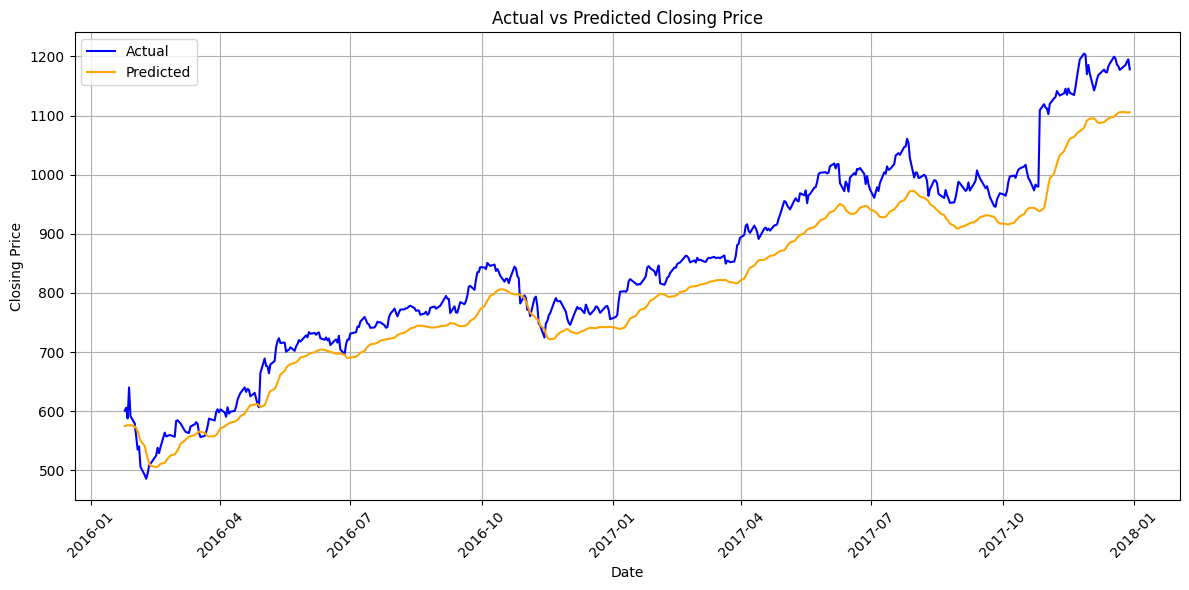

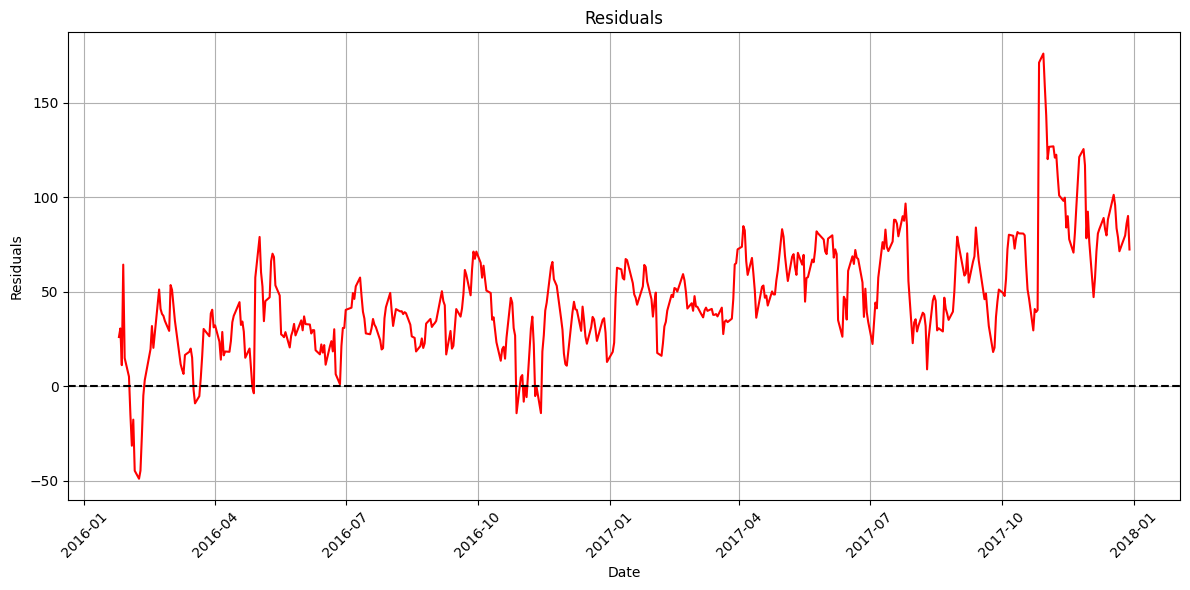

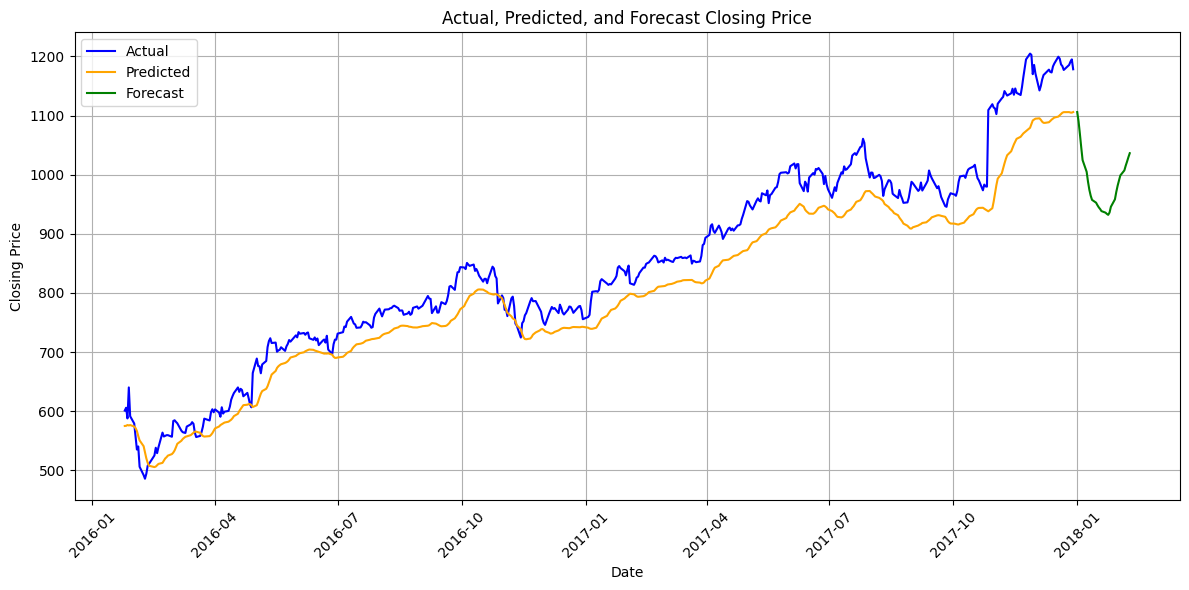

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit

# Load data
data_path = '/Users/subin/Documents/LUT-Files/ADAML/Machine-learning/workshop2/stock-files/AMZN_2006-01-01_to_2018-01-01.csv'
df = pd.read_csv(data_path)

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering
df['Return'] = df['Close'].pct_change()  # Daily returns
df['Volatility'] = (df['High'] - df['Low']) / df['Low']  # Intraday volatility
df['Lag_1'] = df['Close'].shift(1)
df['Lag_5'] = df['Close'].shift(5)
df['Lag_10'] = df['Close'].shift(10)
df['Lag_15'] = df['Close'].shift(15)  # Additional lag feature
df['Lag_20'] = df['Close'].shift(20)  # Additional lag feature
df['Rolling_Mean_10'] = df['Close'].rolling(window=10).mean()  # 10-day rolling mean
df['Rolling_Mean_20'] = df['Close'].rolling(window=20).mean()  # 20-day rolling mean

# Drop NA values
df.dropna(inplace=True)

# Scaling Data using MinMaxScaler
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Volatility', 'Lag_1', 'Lag_5', 'Lag_10', 'Lag_15', 'Lag_20', 'Rolling_Mean_10', 'Rolling_Mean_20']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Sequence Preparation: 
sequence_length = 60  
X, Y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    Y.append(scaled_data[i + sequence_length, 3])  # Target: 'Close' price (index 3)

X, Y = np.array(X), np.array(Y)

# Model Architecture
def build_model():
    inputs = Input(shape=(sequence_length, len(features)))

    # Embedding Layer
    embedded_inputs = Dense(64, activation="relu")(inputs)  # Dense layer for embedding

    # LSTM layers
    lstm_1 = LSTM(128, return_sequences=True)(embedded_inputs)
    lstm_2 = LSTM(128, return_sequences=False)(lstm_1)
    
    # Dropout
    dropout = Dropout(0.2)(lstm_2)
    
    # Fully Connected Output Layer
    output = Dense(1)(dropout)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    return model

# Function to perform multi-step forecasting
def multi_step_forecast(model, X_input, forecast_steps=30):
    forecast = []
    current_input = X_input[-1].reshape(1, sequence_length, len(features))  # Last known sequence
    
    for _ in range(forecast_steps):
        pred = model.predict(current_input)
        forecast.append(pred[0, 0])  # Append the predicted value
        
        # Use predicted value as the next input for forecasting (rolling prediction)
        current_input = np.roll(current_input, shift=-1, axis=1)  # Shift data
        current_input[0, -1, 3] = pred  # Set the predicted value as the new input
    
    return np.array(forecast)

# Blocked Cross-Validation (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold cross-validation

mse_scores, r2_scores, mape_scores = [], [], []

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    # Split data into training and testing
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    # Build the model
    model = build_model()

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

    # Training
    history = model.fit(
        X_train, Y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    predictions = model.predict(X_test)

    # Denormalizing predictions and Y_test
    predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], X.shape[2] - 1))), axis=1))[:, 0]
    Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], X.shape[2] - 1))), axis=1))[:, 0]

    # Evaluation Metrics
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

    mse_scores.append(mse)
    r2_scores.append(r2)
    mape_scores.append(mape)

    # Fold results
    print(f"Fold {fold} - MSE: {mse:.4f}, R-squared: {r2:.4f}, MAPE: {mape:.4f}%")

# Calculate average scores
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
avg_mape = np.mean(mape_scores)

# Average scores
print(f"\nFinal Average MSE: {avg_mse:.4f}")
print(f"Final Average R-squared: {avg_r2:.4f}")
print(f"Final Average MAPE: {avg_mape:.4f}%")

# Multi-Step Forecast using the last observed test input
forecast_steps = 30
multi_step_forecast_result = multi_step_forecast(model, X_test, forecast_steps)

# Denormalize forecast
multi_step_rescaled = scaler.inverse_transform(np.concatenate((multi_step_forecast_result.reshape(-1, 1), np.zeros((multi_step_forecast_result.shape[0], X.shape[2] - 1))), axis=1))[:, 0]

# Forecasting and multi-step plotting with dates
last_date = df.index[-1]  # Get the last date of the dataset
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Generate forecast dates

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(Y_test):], Y_test, label="Actual", color="blue")
plt.plot(df.index[-len(Y_test):], predictions, label="Predicted", color="orange")
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Residuals Plot
residuals = Y_test - predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(Y_test):], residuals, label="Residuals", color="red")
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multi-Step Forecast Plot 
extended_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(Y_test):], Y_test, label="Actual", color="blue")
plt.plot(df.index[-len(Y_test):], predictions, label="Predicted", color="orange")
plt.plot(extended_dates, multi_step_rescaled, label="Forecast", color="green")
plt.title("Actual, Predicted, and Forecast Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
